In [3]:
import pandas as pd
import numpy as np
import plotly
import importlib
import asana
import wartsila_asana_utils as wa

import plotly.express as px

In [4]:
importlib.reload(wa)

<module 'wartsila_asana_utils' from 'C:\\Users\\dha042\\Documents\\W_Development\\Resource_Planning\\wartsila_asana_utils.py'>

In [47]:
#load all task data
rsc_task_list = wa.get_api_rsc_tasks()
df_tasks = wa.make_rsc_tasks_df(rsc_task_list)
df_tasks = wa.prep_task_display_table(df_tasks)

In [48]:
role_options = sorted(df_tasks['region'].unique().tolist())
role_options

['AMER', 'EUAF', 'MEA', 'no_region']

In [10]:

df_dag = df_tasks[df_tasks['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])]
df_dag = df_dag[df_dag['eso_project_name'].str.contains('Dagget')]


    

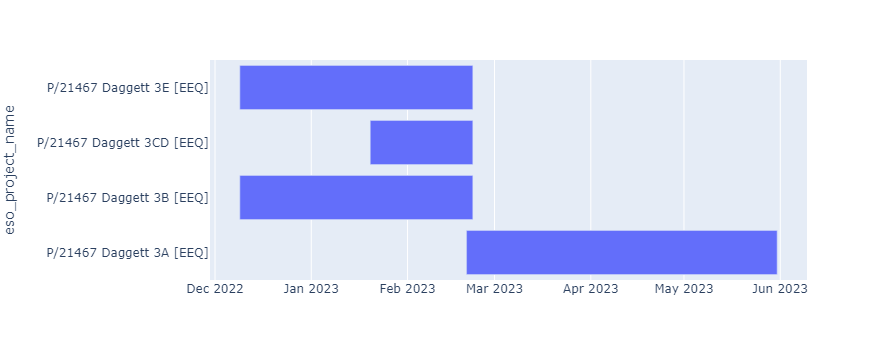

In [11]:
px.timeline(df_dag, x_start='start_date', x_end='due_date', y='eso_project_name')

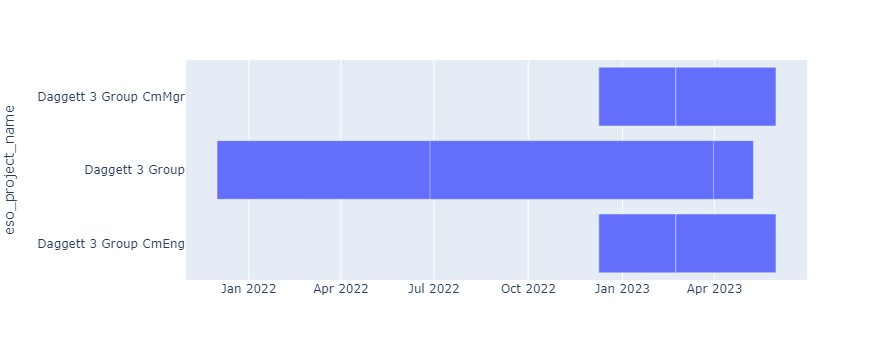

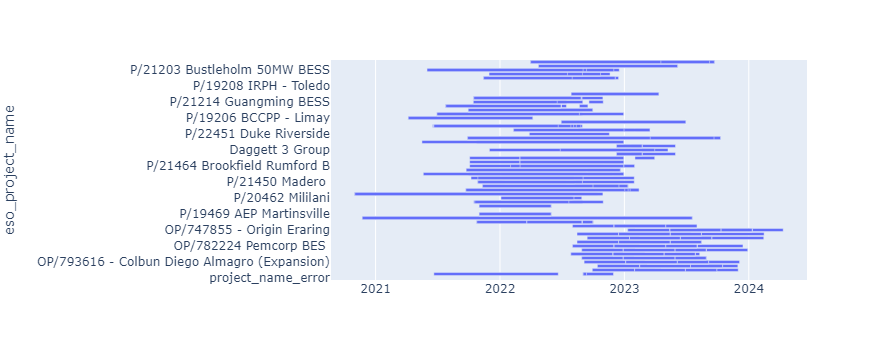

In [59]:
def make_project_groups(df):
    df['eso_sub_project'] = df['eso_project_name']

    # Dagget 3 Group
    daggett3_mask = df['eso_project_name'].str.contains('Daggett 3')
    df.loc[df['eso_project_name'].str.contains('Daggett 3'), 'eso_project_name']='Daggett 3 Group'
    daggett3_group_mask = df['eso_project_name'] == 'Daggett 3 Group'
    
    dag_ce_mask = (daggett3_group_mask) & (df['role']=='Commissioning Engineer')
    dag_cm_mask = (daggett3_group_mask) & (df['role']=='Commissioning Manager')
    
    df.loc[dag_ce_mask, 'eso_project_name'] = 'Daggett 3 Group CmEng'
    df.loc[dag_cm_mask, 'eso_project_name'] = 'Daggett 3 Group CmMgr'
    
    return df

df_out = make_project_groups(df_tasks.copy())

daggett3_group_mask = df_out['eso_project_name'] == 'Daggett 3 Group'
d3cx_mask = (df_out['eso_project_name'] == 'Daggett 3 CE') | (df_out['eso_project_name'] == 'Daggett 3 CM')
df_out[d3cx_mask]

all_dag3_mask = df_out['eso_project_name'].str.contains('Daggett 3')
px.timeline(df_out[all_dag3_mask], x_start='start_date', x_end='due_date', y='eso_project_name').show()

# px.timeline(df_out[daggett3_group_mask], x_start='start_date', x_end='due_date', y='eso_project_name').show()
px.timeline(df_out, x_start='start_date', x_end='due_date', y='eso_project_name')

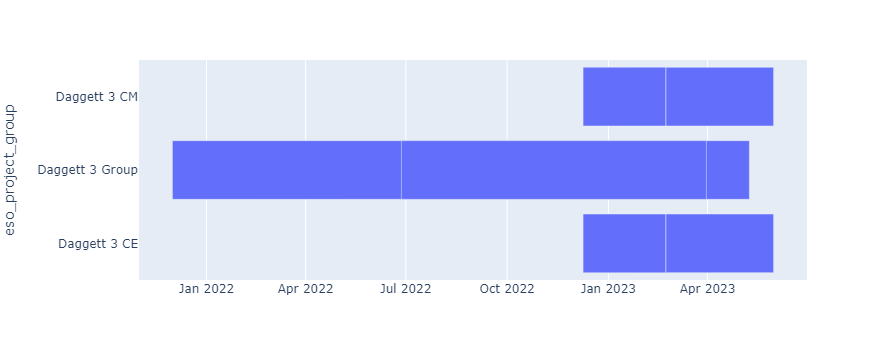

In [46]:
# daggett3_group_mask = df_out['eso_project_group'] == 'Daggett 3 Group'
# dag_ce_mask = (daggett3_group_mask) & (df_out['role']=='Commissioning Engineer')
# dag_cm_mask = (daggett3_group_mask) & (df_out['role']=='Commissioning Manager')

# df_out.loc[dag_ce_mask, 'eso_project_group'] = 'Daggett 3 CE'
# df_out.loc[dag_cm_mask, 'eso_project_group'] = 'Daggett 3 CM'

d3cx_mask = (df_out['eso_project_group'] == 'Daggett 3 CE') | (df_out['eso_project_group'] == 'Daggett 3 CM')
df_out[d3cx_mask]

all_dag3_mask = df_out['eso_project_group'].str.contains('Daggett 3')
px.timeline(df_out[all_dag3_mask], x_start='start_date', x_end='due_date', y='eso_project_group')


In [30]:
df= df_tasks.copy()
daggett3_mask = df['eso_project_name'].str.contains('Daggett 3')

df[daggett3_mask] 

,assignee_name,role,region,eso_project_name,start_date,due_date,project_type
267,raul de jesus,Commissioning Engineer,AMER,P/21467 Daggett 3A [EEQ],2023-02-20,2023-05-31,no_type
268,Glen Jarvis,System Engineer,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
269,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
270,Rigel G,Solution Engineer,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
271,unassigned,SW Engineer,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
272,Edward Simon,Project Manager,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
273,raul de jesus,Commissioning Manager,AMER,P/21467 Daggett 3A [EEQ],2023-02-20,2023-05-31,no_type
274,Glen Jarvis,System Engineer,AMER,P/21467 Daggett 3B [EEQ],2021-12-01,2023-05-09,no_type
275,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3B [EEQ],NaT,NaT,no_type
276,Rigel G,Solution Engineer,AMER,P/21467 Daggett 3B [EEQ],2022-06-27,2023-03-31,no_type


In [31]:
df_tasks[df_tasks['eso_project_name'].str.contains('Dagget')].sort_values('role')

,assignee_name,role,region,eso_project_name,start_date,due_date,project_type
289,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3E [EEQ],NaT,NaT,no_type
269,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3A [EEQ],NaT,NaT,no_type
282,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3CD [EEQ],NaT,NaT,no_type
275,Robert Björkman,CPE Electrical,AMER,P/21467 Daggett 3B [EEQ],NaT,NaT,no_type
267,raul de jesus,Commissioning Engineer,AMER,P/21467 Daggett 3A [EEQ],2023-02-20,2023-05-31,no_type
287,raul de jesus,Commissioning Engineer,AMER,P/21467 Daggett 3CD [EEQ],2023-01-20,2023-02-22,no_type
280,raul de jesus,Commissioning Engineer,AMER,P/21467 Daggett 3B [EEQ],2022-12-09,2023-02-22,no_type
294,raul de jesus,Commissioning Engineer,AMER,P/21467 Daggett 3E [EEQ],2022-12-09,2023-02-22,no_type
279,raul de jesus,Commissioning Manager,AMER,P/21467 Daggett 3B [EEQ],2022-12-09,2023-02-22,no_type
293,raul de jesus,Commissioning Manager,AMER,P/21467 Daggett 3E [EEQ],2022-12-09,2023-02-22,no_type
